
	One-sample Kolmogorov-Smirnov test

data:  sampleMean
D = 0.058377, p-value < 2.2e-16
alternative hypothesis: two-sided

----------------------------------------------
	One-sample Kolmogorov-Smirnov test

data:  sampleMean
D = 0.013264, p-value = 0.05927
alternative hypothesis: two-sided

----------------------------------------------
	One-sample Kolmogorov-Smirnov test

data:  sampleMean
D = 0.0095654, p-value = 0.3195
alternative hypothesis: two-sided

----------------------------------------------
	One-sample Kolmogorov-Smirnov test

data:  sampleMean
D = 0.012821, p-value = 0.07468
alternative hypothesis: two-sided

----------------------------------------------
	One-sample Kolmogorov-Smirnov test

data:  sampleMean
D = 0.0098447, p-value = 0.287
alternative hypothesis: two-sided

----------------------------------------------
	One-sample Kolmogorov-Smirnov test

data:  sampleMean
D = 0.0093252, p-value = 0.3494
alternative hypothesis: two-sided

---------------------------------

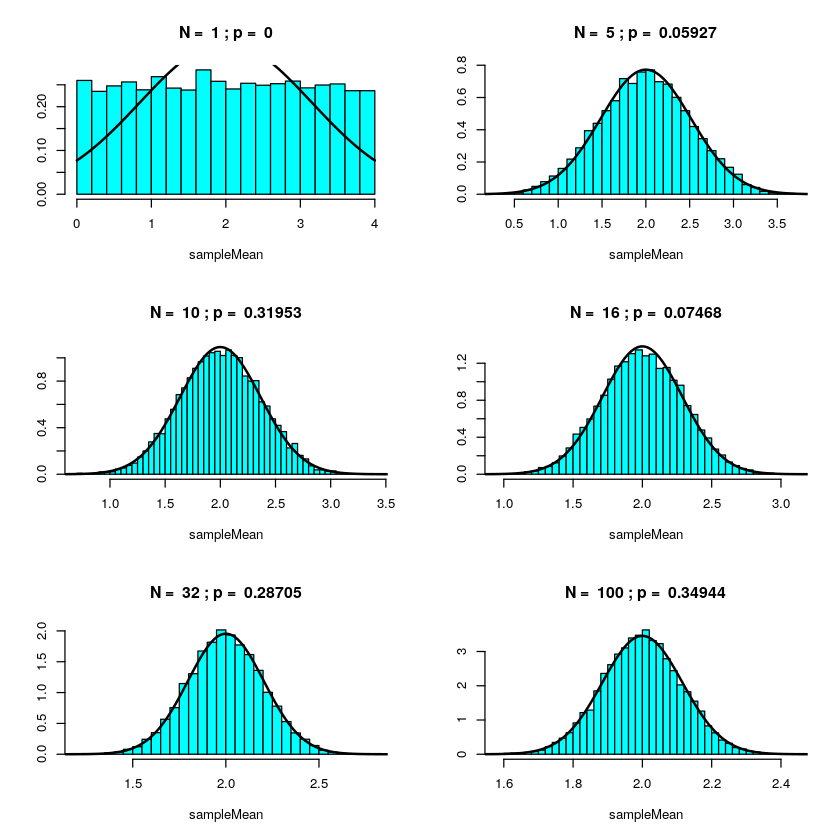

In [19]:
library("MASS")

set.seed(123) # set the seed for reproducibility
sets <- 10000 # set of samples

N <- c(1, 5, 10, 16, 32, 100) # number of samples

# uniform distribution
# limits for uniform distribution (using same values like in the exercise before)
a <- 0
b <- 4
# calculate mean and variance of uniform distribution
mu = 0.5 * (a + b)
var = (b - a)^2 / 12

# png("ksTest.png")
p <- par(mfrow = c(3, 2))
for (i in N) {
    # produce a matrix of samples and build row mean
    samples <- matrix(runif(sets * i, a, b), nrow = sets, ncol = i)
    sampleMean <- rowMeans(samples)
    # calculate standard deviation
    sd = sqrt(var)/sqrt(i)
    
    # apply kolmogorov smirnov test
    test <- ks.test(sampleMean, "pnorm", mu, sd)
    print(test)
    cat("----------------------------------------------")

    # plotting
    truehist(sampleMean, main = paste("N = ", i, "; p = ", round(test$p.value, 5)))
    # overplot a normal distribution
    x <- seq(0, 4, length = 1000)
    lines(x, dnorm(x, mu, sd), lwd = 2)
}
par(p)

In case of $N = 0$ the null hypothesis can be rejected, why we can conclude that we have no underlying normal distribution. For $N > 5$ we can see, that the p value of the Kolmogorov-Smirnov test increases with increasing N. Therefore, (for $p \geq 0.05$) the null hypothesis cannot be rejected and we can assume that we have a underlying normal distribution. Furthermore, for $N = 100$ we have the highest p value and therefore the best fit with our underlying normal distribution with our sample. Seeing this, we can conclude that the central limit theorem is valid.